In [1]:
import sklearn as sk
import matplotlib
from matplotlib.pylab import *
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import os
data_path = 'data/stop-and-frisk'
files = sorted(os.listdir(data_path))
data_files = [os.path.join(data_path, filename) for filename in files if filename.endswith('.csv')]

In [3]:
data_files

['data/stop-and-frisk/2003.csv',
 'data/stop-and-frisk/2004.csv',
 'data/stop-and-frisk/2005.csv',
 'data/stop-and-frisk/2006.csv',
 'data/stop-and-frisk/2007.csv',
 'data/stop-and-frisk/2008.csv',
 'data/stop-and-frisk/2009.csv',
 'data/stop-and-frisk/2010.csv',
 'data/stop-and-frisk/2011.csv',
 'data/stop-and-frisk/2012.csv',
 'data/stop-and-frisk/2013.csv',
 'data/stop-and-frisk/2014.csv',
 'data/stop-and-frisk/2015.csv',
 'data/stop-and-frisk/2016.csv']

In [4]:
frame = pd.DataFrame()
l = []
for file in data_files[:]:
    df = pd.read_csv(file,index_col=None, header=0, encoding='latin1')
    l.append(df)
    break
frame = pd.concat(l)

/home/andreas/projects/7scientists/notebooks/fatml/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
datetime.datetime.strptime(frame.timestop[0], '%H:%M'), frame.timestop[0]

(datetime.datetime(1900, 1, 1, 3, 0), '03:00')

In [2856]:
import datetime, operator, functools

behavior_attribs = []

appearance_attribs = [
    'age',      # SUSPECT'S AGE
    'weight',   # SUSPECT'S WEIGHT
    'ht_feet',  # SUSPECT'S HEIGHT (FEET)
    'eyecolor', # SUSPECT'S EYE COLOR
    'haircolr', # SUSPECT'S HAIRCOLOR
    'race',     # SUSPECT'S RACE
    'sex',      # SUSPECT'S SEX
    'build',    # SUSPECT'S BUILD
]

environment_attribs = [
    'inout',    # WAS STOP INSIDE OR OUTSIDE?
    'trhsloc',  # WAS LOCATION HOUSING OR TRANSIT AUTHORITY?
    'timestop', # TIME OF STOP (HH:MM)
    'pct'       # PRECINCT OF STOP (FROM 1 TO 123)
]

one_hot_attribs = appearance_attribs + environment_attribs

yes_no_behavior_attribs = [
    'ac_evasv', # EVASIVE RESPONSE TO QUESTIONING
    'ac_assoc', # ASSOCIATING WITH KNOWN CRIMINALS
    'cs_lkout', # SUSPECT ACTING AS A LOOKOUT
    'cs_drgtr', # ACTIONS INDICATIVE OF A DRUG TRANSACTION
    'cs_casng', # CASING A VICTIM OR LOCATION
    'cs_vcrim', # VIOLENT CRIME SUSPECTED
    'ac_cgdir', # CHANGE DIRECTION AT SIGHT OF OFFICER
    'cs_furtv', # FURTIVE MOVEMENTS
    'ac_stsnd', # SIGHTS OR SOUNDS OF CRIMINAL ACTIVITY
]

yes_no_environment_attribs = [
    'ac_proxm',  # PROXIMITY TO SCENE OF OFFENSE
    'cs_other',  # OTHER
    'ac_rept',   # REPORT BY VICTIM / WITNESS / OFFICER
    'ac_inves',  # ONGOING INVESTIGATION
    'ac_incid',  # AREA HAS HIGH CRIME INCIDENCE
    'ac_time',   # TIME OF DAY FITS CRIME INCIDENCE
]

yes_no_appearance_attribs = [
    'cs_cloth', # WEARING CLOTHES COMMONLY USED IN A CRIME
    'cs_objcs', # CARRYING SUSPICIOUS OBJECT
    'cs_bulge', # SUSPICIOUS BULGE
    'cs_descr', # FITS A RELEVANT DESCRIPTION
    'rf_attir', # INAPPROPRIATE ATTIRE FOR SEASON
]

yes_no_frisk_attribs = [
    'rf_othsw', # OTHER SUSPICION OF WEAPONS    
    'rf_knowl', # KNOWLEDGE OF SUSPECTS PRIOR CRIMINAL BEHAVIOR
    'rf_vcact', # ACTIONS OF ENGAGING IN A VIOLENT CRIME
    'rf_verbl', # VERBAL THREATS BY SUSPECT    
]

yes_no_target_attribs = [
    'arstmade', # WAS AN ARREST MADE?
    'frisked',  # WAS SUSPECT FRISKED?
    'sumissue'  # WAS A SUMMONS ISSUED?
]

yes_no_attribs = yes_no_behavior_attribs + yes_no_environment_attribs + yes_no_appearance_attribs + yes_no_target_attribs + yes_no_frisk_attribs

yes_no_conditions = functools.reduce(operator.and_, [(frame[attrib] != ' ') for attrib in yes_no_attribs])

invalid_times = []
for x in frame.timestop:
    try:
        dt = datetime.datetime.strptime(x,'%H:%M')
    except:
        invalid_times.append(x)
        continue

num_frame = frame[ yes_no_conditions & (~frame.timestop.isin(invalid_times)) & \
                  (frame.race != ' ') & \
                  (~frame.dob.isin((' ','12311900','01011901'))) & \
                  (frame.datestop != NaN) & \
                  (frame.weight != ' ') & \
                  (frame.build != ' ') & \
                  (frame.sex.isin(('M','F')))]

num_frame['rand'] = np.random.randint(0, 1, len(num_frame))
num_frame.dob = num_frame.dob.map(lambda x:datetime.datetime.strptime('{}'.format(x),'%m%d%Y').date())
num_frame.datestop = num_frame.datestop.map(lambda x:datetime.datetime.strptime('{}'.format(x),'%m%d%Y').date())
num_frame['age_cont'] = (num_frame.datestop - num_frame.dob).map(lambda x: x.days/365.0)
num_frame.age = (num_frame.datestop - num_frame.dob).map(lambda x: int(x.days/365.0/20.0))
num_frame.timestop = num_frame.timestop.map(lambda x:datetime.datetime.strptime(x,'%H:%M').hour).apply(np.int)

num_frame = num_frame[(0 <= num_frame.age_cont) & (num_frame.age_cont <= 100)]

eyecolor_map = dict([(c,i) for i,c in enumerate(frame.eyecolor.unique())])
haircolr_map = dict([(c,i) for i,c in enumerate(frame.haircolr.unique())])
race_map = dict([(c,i) for i,c in enumerate(frame.race.unique())])
build_map = dict([(c,i) for i,c in enumerate(frame.build.unique())])
trhsloc_map = dict([(c,i) for i,c in enumerate(frame.trhsloc.unique())])
inout_map = dict([(c,i) for i,c in enumerate(frame.inout.unique())])


for attrib in yes_no_attribs:
    num_frame[attrib] = num_frame[attrib].map(dict(Y=1, N=0)).apply(np.int)

num_frame.haircolr = num_frame.haircolr.map(haircolr_map).apply(np.int)
num_frame.eyecolor = num_frame.eyecolor.map(eyecolor_map).apply(np.int)
num_frame.sex = num_frame.sex.map(dict(M=0, F=1)).apply(np.int)
num_frame.race = num_frame.race.map(race_map).apply(np.int)
num_frame['black'] = num_frame.race.map(lambda x: 1 if x == race_map['B'] else 0).apply(np.int)
num_frame['arrest_or_summon'] = num_frame.arstmade | num_frame.sumissue
num_frame.build = num_frame.build.map(build_map).apply(np.int)
num_frame.inout = num_frame.inout.map(inout_map).apply(np.int)
num_frame.trhsloc = num_frame.trhsloc.map(trhsloc_map).apply(np.int)
num_frame.age = num_frame.age.apply(np.int)
num_frame.weight = num_frame.weight.apply(np.float)
num_frame.ht_feet = num_frame.ht_feet.apply(np.float)
num_frame = num_frame[(num_frame.weight < 500) & (num_frame.weight > 50) & (num_frame.ht_feet != 0)]
num_frame.weight = num_frame.weight.map(lambda x: int(x/100.0))

num_frame = num_frame.reset_index()

/home/andreas/projects/7scientists/notebooks/fatml/venv/lib/python3.5/site-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/andreas/projects/7scientists/notebooks/fatml/venv/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/andreas/projects/7scientists/notebooks/fatml/venv/lib/python3.5/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [ ]:
#

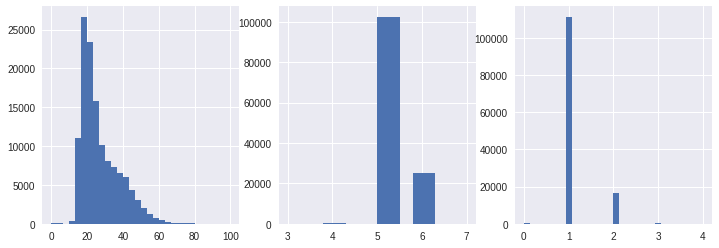

In [1821]:
figure(figsize=(12,4))
subplot(131)
hist(num_frame['age_cont'],bins=30)
subplot(132)
hist(num_frame['ht_feet'], width=0.5);
subplot(133)
hist(num_frame['weight'], bins=30);

In [2901]:
treatment = num_frame.groupby(['race', 'frisked','arrest_or_summon']).frisked.agg(['count'])

nodes = []
links = []


mistreatment_all = len(num_frame[(num_frame.frisked == 1) & (num_frame.arrest_or_summon == 0)]) \
      /float(len(num_frame[ (num_frame.frisked == 1)]))

nodes.append({
    "name" : "",
    "id" : "all"
})
    
for key, value in race_map.items():
    
    if not key in ('B', 'W', 'P', 'Z', 'Q', 'A'):
        continue

    j = len(nodes)
    
    print(key, value)
    
    mistreatment = len(num_frame[(num_frame.race == value) & (num_frame.frisked == 1) & (num_frame.arrest_or_summon == 0)]) \
                  /float(len(num_frame[(num_frame.race == value) & (num_frame.frisked == 1)]))

    frisk_ratio = len(num_frame[(num_frame.race == value) & (num_frame.frisked == 1)]) \
                  /float(len(num_frame[(num_frame.race == value)]))

        
    nodes.append({
        "name" : key,
        "id" : key,
    })
    nodes.append({
        "name" : "{:.0f} %".format(frisk_ratio*100),
        "id" : "{}_frisked".format(key),
        "color" : "#edbd00"
    })
    nodes.append({
        "name" : "",
        "id" : "{}_frisked_arrested".format(key),
        "color" : "#fa9766"
    })
    nodes.append({
        "name" : "",
        "name" : "{:.0f} %".format(mistreatment*100),
        "id" : "{}_frisked_not_arrested".format(key),
        "color" : "#97ba4c"
    })
    nodes.append({
        "name" : "",
        "id" : "{}_not_frisked".format(key),
        "color" : "#33aa00"
    })
    nodes.append({
        "name" : "",
        "id" : "{}_not_frisked_arrested".format(key),
        "color" : "#97ba4c"
    })
    nodes.append({
        "name" : "",
        "id" : "{}_not_frisked_not_arrested".format(key),
        "color" : "#fa9766"
    })
    links.append({
        "source" : 0,
        "target" : j,
        "value" : len(num_frame[num_frame.race == value]) #all people from the given group
    })
    links.append({
        "source" : j,
        "target" : j+1,
        "value" : len(num_frame[(num_frame.race == value) & (num_frame.frisked == 1)]) #all people from the group that were frisked
    })
    links.append({
        "source" : j,
        "target" : j+4,
        "value" : len(num_frame[(num_frame.race == value) & (num_frame.frisked == 0)]) #all people from the group that were not frisked
    })
    links.append({
        "source" : j+4,
        "target" : j+5,
        "value" : len(num_frame[(num_frame.race == value) & (num_frame.frisked == 0) & (num_frame.arrest_or_summon == 0)]) #all people from the group that were not frisked and not arrested
    })
    links.append({
        "source" : j+4,
        "target" : j+6,
        "value" : len(num_frame[(num_frame.race == value) & (num_frame.frisked == 0) & (num_frame.arrest_or_summon == 1)]) #all people from the group that were not frisked and arrested
    })
    links.append({
        "source" : j+1,
        "target" : j+2,
        "value" : len(num_frame[(num_frame.race == value) & (num_frame.frisked == 1) & (num_frame.arrest_or_summon == 1)]) #all people from the group that were frisked and arrested
    })
    links.append({
        "source" : j+1,
        "target" : j+3,
        "value" : len(num_frame[(num_frame.race == value) & (num_frame.frisked == 1) & (num_frame.arrest_or_summon == 0)]) #all people from the group that were frisked and not arrested
    })


A 4
Q 1
W 3
P 7
Z 5
B 0


In [2902]:
import json

with open('viz/sankey/treatment.json','w') as output_file:
    json.dump({
        'nodes' : nodes,
        'links' : links
    }, output_file, indent=2)

In [2903]:
from sklearn.preprocessing import OneHotEncoder

def build_feature_vector(attributes):


    one_hot_columns = [attrib for attrib in one_hot_attribs if attrib in attributes]

    if one_hot_columns:
        enc = OneHotEncoder()
        one_hot_features = enc.fit_transform(num_frame[one_hot_columns]).toarray()
    else:
        one_hot_features = None

    additional_columns = [attrib for attrib in yes_no_attribs+['rand'] if attrib in attributes]
    additional_features = [num_frame[column] for column in additional_columns]
    
    if one_hot_features is not None:
        cc = [one_hot_features]
    else:
        cc = []
        
    if additional_features:
        X = np.concatenate(cc + [ft.as_matrix().reshape([len(num_frame),1]) for ft in additional_features], axis=1)
    else:
        X = one_hot_features
        
    return X


all_attributes = environment_attribs \
    + [attr for attr in appearance_attribs if attr != 'race'] \
    + yes_no_frisk_attribs \
    + yes_no_appearance_attribs \
    + yes_no_behavior_attribs \
    + yes_no_environment_attribs 
    
behavior_attributes = yes_no_frisk_attribs \
    + yes_no_behavior_attribs
    
environment_attributes = environment_attribs + yes_no_environment_attribs

X = build_feature_vector(environment_attributes)

#X = build_feature_vector(['rand'])

#Y = num_frame.black

Y = num_frame.arstmade | num_frame.sumissue

#Y = num_frame.frisked

In [2904]:
from sklearn.model_selection import ShuffleSplit

splitter = ShuffleSplit(test_size=0.3)
ix_train, ix_test = next(splitter.split(X))

X_train, X_test = X[ix_train], X[ix_test]
Y_train, Y_test = Y[ix_train], Y[ix_test]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

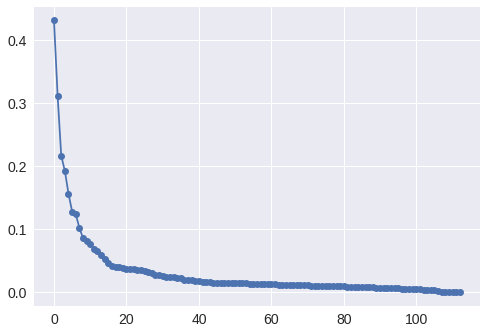

In [2905]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


lgs = LogisticRegression()
pca = PCA()

pipe = Pipeline(steps=[('pca',pca),('logistic',lgs)])

pca.fit(X_train)

plot(pca.explained_variance_,marker='o')

lgs.fit(X_train, Y_train, sample_weight=sw_train)

In [2884]:
def optimize(weight_factor=1.0):
    SW_train = Y_train.map(lambda x: weight_factor if x else 1).as_matrix()
    SW_test = Y_test.map(lambda x: weight_factor if x else 1).as_matrix()
    lgs = LogisticRegression()
    lgs.fit(X_train, Y_train, sample_weight=SW_train)
    Y_pred = lgs.predict(X_test)
    m = confusion_matrix(Y_test, Y_pred)
    acc = accuracy_score(Y_test, Y_pred, sample_weight=SW_test)
    return m, acc, Y_pred

In [2906]:
false_positives = []
true_negatives = []
frisks = []
group_frisks = []
accuracy = []
weight = []
group_mistreatment = []

num_frame_test = num_frame.loc[ix_test]
not_arrested = (~ (num_frame_test.arstmade | num_frame_test.sumissue))
total_mistreatment = sum(num_frame_test.frisked & not_arrested) / float(sum(num_frame_test.frisked == 1))

for w in np.linspace(0,15,50):

    m, acc, Y_pred = optimize(w)
    
    mistreatment = {}
    group_frisks_d = {}
    
    for key, value in race_map.items():
        group_idx = num_frame_test.race == value
        not_arrested_group = not_arrested[group_idx]
        Y_pred_group = Y_pred[group_idx]
        group_frisks_d[key] = sum(Y_pred_group)
        if sum(Y_pred_group):
            mtrt = sum(Y_pred_group & not_arrested_group)/float(sum(Y_pred_group))
        else:
            mtrt = 0.0
        mistreatment[key] = mtrt
    frisks.append(sum(Y_pred))
    group_frisks.append(group_frisks_d)
    group_mistreatment.append(mistreatment)
    false_positives.append(m[0,1])
    true_negatives.append(m[1,0])
    accuracy.append(acc)
    weight.append(w)

In [2758]:
false_positives_2 = false_positives
true_negatives_2 = true_negatives
accuracy_2 = accuracy
weight_2 = weight
frisks_2 = frisks
group_mistreatment_2 = group_mistreatment

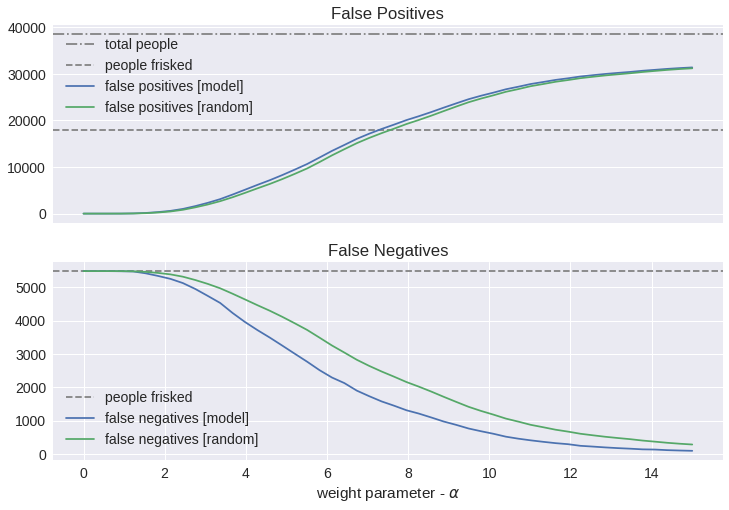

In [2909]:
total_people = len(num_frame_test)
#if we train for arrests
total_arrests_made = sum(num_frame_test.arstmade | num_frame_test.sumissue)
#if we train for frisked
#total_arrests_made = sum(num_frame_test.frisked)

sns.set(font_scale=1.4)
figure(figsize=(12,8))
subplot(211)
axhline(total_people,ls='-.',color='grey')
axhline(sum(num_frame_test.frisked), color='grey',ls='--')
plot(weight, (total_people-total_arrests_made)*(np.array(frisks)/total_people))
plot(weight,false_positives)
title("False Positives")
xticks([])
legend(["total people", "people frisked", "false positives [model]", "false positives [random]"])
subplot(212)
axhline(total_arrests_made, color='grey',ls='--')
title("False Negatives")
plot(weight, true_negatives)
plot(weight, total_arrests_made*(1.0-np.array(frisks)/total_people))
legend(["people frisked", "false negatives [model]", "false negatives [random]"])
xlabel("weight parameter - $\\alpha$")

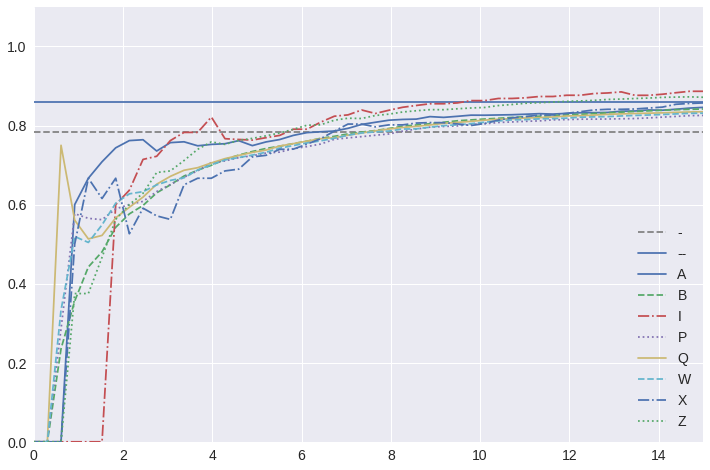

In [2812]:
import matplotlib.pyplot as plt
from itertools import cycle

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

figure(figsize=(12,8))
axhline(total_mistreatment,ls='--', color='grey')
axhline(1-total_arrests_made/total_people)
legends = ['-','--']
xlim(0,15)
ylim(0,1.1)
for key in sorted(race_map):
    if key in (' ', 'U'):
        continue
    legends.append(key)
    plot(weight,[g[key] for g in group_mistreatment], ls=next(linecycler))
legend(legends)

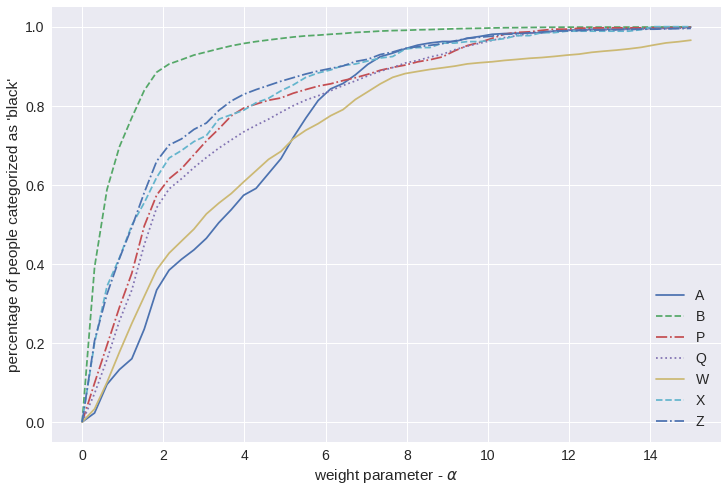

In [2880]:
import matplotlib.pyplot as plt
from itertools import cycle

lines = ["-","--","-.",":"]
linecycler = cycle(lines)

legends = []

figure(figsize=(12,8))
for key in sorted(race_map):
    if key in (' ', 'U','I'):
        continue
    legends.append(key)
    plot(weight,[g[key] for g in group_frisks]/sum(num_frame_test.race == race_map[key]), ls=next(linecycler))
legend(legends)
xlabel("weight parameter - $\\alpha$")
ylabel("percentage of people categorized as 'black'")

In [2929]:
nodes = []
links = []


m, acc, Y_pred = optimize(7.0)

num_frame_test['Y'] = Y_pred

mistreatment_all = len(num_frame_test[(num_frame_test.Y == 1) & (num_frame_test.arrest_or_summon == 0)]) \
      /float(len(num_frame_test[ (num_frame_test.Y == 1)]))

nodes.append({
    "name" : "",
    "id" : "all"
})
    
for key, value in race_map.items():
    
    if not key in ('B', 'W', 'P', 'Z', 'Q', 'A'):
        continue

    j = len(nodes)
    
    print(key, value)
    
    mistreatment = len(num_frame_test[(num_frame_test.race == value) & (num_frame_test.Y == 1) & (num_frame_test.arrest_or_summon == 0)]) \
                  /float(len(num_frame_test[(num_frame_test.race == value) & (num_frame_test.Y == 1)]))

    frisk_ratio = len(num_frame_test[(num_frame_test.race == value) & (num_frame_test.Y == 1)]) \
                  /float(len(num_frame_test[(num_frame_test.race == value)]))

        
    nodes.append({
        "name" : key,
        "id" : key,
    })
    nodes.append({
        "name" : "{:.0f} %".format(frisk_ratio*100),
        "id" : "{}_frisked".format(key),
        "color" : "#edbd00"
    })
    nodes.append({
        "name" : "",
        "id" : "{}_frisked_arrested".format(key),
        "color" : "#fa9766"
    })
    nodes.append({
        "name" : "",
        "name" : "{:.0f} %".format(mistreatment*100),
        "id" : "{}_frisked_not_arrested".format(key),
        "color" : "#97ba4c"
    })
    nodes.append({
        "name" : "",
        "id" : "{}_not_frisked".format(key),
        "color" : "#33aa00"
    })
    nodes.append({
        "name" : "",
        "id" : "{}_not_frisked_arrested".format(key),
        "color" : "#97ba4c"
    })
    nodes.append({
        "name" : "",
        "id" : "{}_not_frisked_not_arrested".format(key),
        "color" : "#fa9766"
    })
    links.append({
        "source" : 0,
        "target" : j,
        "value" : len(num_frame_test[num_frame_test.race == value]) #all people from the given group
    })
    links.append({
        "source" : j,
        "target" : j+1,
        "value" : len(num_frame_test[(num_frame_test.race == value) & (num_frame_test.Y == 1)]) #all people from the group that were frisked
    })
    links.append({
        "source" : j,
        "target" : j+4,
        "value" : len(num_frame_test[(num_frame_test.race == value) & (num_frame_test.Y == 0)]) #all people from the group that were not frisked
    })
    links.append({
        "source" : j+4,
        "target" : j+5,
        "value" : len(num_frame_test[(num_frame_test.race == value) & (num_frame_test.Y == 0) & (num_frame_test.arrest_or_summon == 0)]) #all people from the group that were not frisked and not arrested
    })
    links.append({
        "source" : j+4,
        "target" : j+6,
        "value" : len(num_frame_test[(num_frame_test.race == value) & (num_frame_test.Y == 0) & (num_frame_test.arrest_or_summon == 1)]) #all people from the group that were not frisked and arrested
    })
    links.append({
        "source" : j+1,
        "target" : j+2,
        "value" : len(num_frame_test[(num_frame_test.race == value) & (num_frame_test.Y == 1) & (num_frame_test.arrest_or_summon == 1)]) #all people from the group that were frisked and arrested
    })
    links.append({
        "source" : j+1,
        "target" : j+3,
        "value" : len(num_frame_test[(num_frame_test.race == value) & (num_frame_test.Y == 1) & (num_frame_test.arrest_or_summon == 0)]) #all people from the group that were frisked and not arrested
    })


A 4
Q 1
W 3
P 7
Z 5
B 0


In [2930]:
import json

with open('viz/sankey/treatment_algo.json','w') as output_file:
    json.dump({
        'nodes' : nodes,
        'links' : links
    }, output_file, indent=2)

In [1944]:
from sklearn.svm import SVC
clf = SVC()
N = 6000
clf.fit(X_train[:N], Y_train[:N], sample_weight=sw_train[:N])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1945]:
from sklearn.metrics import confusion_matrix
Y_pred = clf.predict(X_test)
confusion_matrix(Y_test, Y_pred), accuracy_score(Y_test, Y_pred, sample_weight=sw_test)

(array([[ 1443, 31762],
        [   94,  5262]]), 0.62309687085806487)

In [1988]:
from sklearn.naive_bayes import MultinomialNB

gnb = MultinomialNB()
gnb.fit(X_train, Y_train, sample_weight=sw_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1989]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
Y_pred = gnb.predict(X_test)
Y_pred_train = gnb.predict(X_train)
confusion_matrix(Y_test, Y_pred), accuracy_score(Y_test, Y_pred, sample_weight=sw_test)
#confusion_matrix(Y_train, Y_pred_train), accuracy_score(Y_train, Y_pred_train, sample_weight=sw_train)

(array([[11543, 21662],
        [  805,  4551]]), 0.65755777099060686)

In [1968]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [1969]:
N = None
from sklearn.metrics import confusion_matrix
Y_pred = dtr.predict(X_test[:N])
confusion_matrix(Y_test, Y_pred), accuracy_score(Y_test, Y_pred, sample_weight=sw_test)

(array([[32882,   323],
        [ 5120,   236]]), 0.40617760617760618)

In [1970]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100)
rfr.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [1971]:
N = None
from sklearn.metrics import confusion_matrix
Y_pred = rfr.predict(X_test[:N])
confusion_matrix(Y_test[:N], Y_pred)

array([[32822,   383],
       [ 5081,   275]])

In [285]:
len(Y_test[Y_test == 1])

5356

In [284]:
len(num_frame.pct.unique())+len(num_frame.race.unique())+len(num_frame.haircolr.unique())+len(num_frame.sex.unique())

102

In [222]:
num_frame.build.unique()

array([0, 2, 3, 1, 5])

In [38]:
num_frame.cs_cloth.unique()

array(['N', 'Y'], dtype=object)

In [247]:
len(Y_test[Y_test == 1])

3615

In [299]:
len(num_frame[(num_frame.frisked == 1) & ((num_frame.arstmade == 1) | (num_frame.sumissue == 1))])

12912

In [300]:
len(num_frame[(num_frame.frisked == 1) & ((num_frame.arstmade == 0) & (num_frame.sumissue == 0))])

47203

In [318]:
len(((num_frame.arstmade == 1) | (num_frame.sumissue == 1)).map(lambda x: 10 if x else 1).as_matrix())

128534

In [324]:
len(X_train)

62981

In [358]:
len(num_frame[ ((num_frame.arstmade == 1)) & (num_frame.frisked == 0)])

2152

In [1133]:
from scipy.stats.stats import pearsonr

cm = np.zeros((X.shape[1],))

for i in range(X.shape[1]):
    cm[i] = pearsonr(X[:,i],Y)[0]

<Container object of 144 artists>

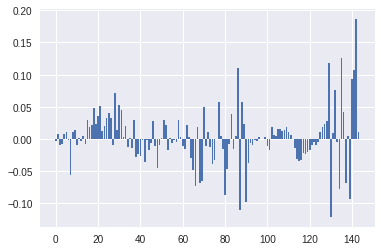

In [1744]:
bar(range(len(cm)),cm)

In [ ]:
argmax()

# Things to prove / investigate

* What is disparate treatment / impact in this case
* How we can build an algorithm that treats people more fairly
* How we can prove the faireness of the algorithm according to our criteria
* How can we remove bias from the input data
* How can we explain the decision making of the algorithm to the affected people

In [2293]:
X_race = build_feature_vector(['build','age','ht_feet','weight'])
Y_race = (num_frame.race == race_map['B']).apply(np.int)

In [2294]:
from sklearn.model_selection import train_test_split
X_race_train, X_race_test, Y_race_train, Y_race_test = train_test_split(X_race, Y_race, test_size=0.3, random_state=42)

In [2295]:
lgs = LogisticRegression()
lgs.fit(X_race_train, Y_race_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [2296]:
from sklearn.metrics import confusion_matrix
Y_race_pred = lgs.predict(X_race_test)
confusion_matrix(Y_race_test, Y_race_pred), accuracy_score(Y_race_test, Y_race_pred, sample_weight=sw_test)

(array([[16384,  2760],
        [14307,  5110]]), 0.55507405059643866)

In [2297]:
1-sum(Y_race_test)/len(Y_race_test)

0.49646015404164834